<a href="https://colab.research.google.com/github/Rimsha-Naaz12/PROJECT-GENAI/blob/main/genai_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Reinforcement Learning-Driven ANN Model for Adaptive Solar Radiation Forecasting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim


In [ ]:
df_raw = pd.read_excel("/content/Data_Solar Radiation.xlsx", sheet_name="Sheet1", skiprows=1)

In [ ]:
df_raw.columns = [
    "From Date", "To Date", "PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "SO2", "CO",
    "Ozone", "Benzene", "Toluene", "Temp", "RH", "WS", "WD", "BP", "Xylene", "AT", "SR"
]


In [ ]:
df_raw["From Date"] = pd.to_datetime(df_raw["From Date"], dayfirst=True, errors='coerce')
df = df_raw.dropna().sort_values("From Date").reset_index(drop=True)

In [ ]:
X = df.drop(columns=["From Date", "To Date", "SR"])
y = df["SR"].values.reshape(-1, 1)

In [ ]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [ ]:
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [ ]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)


In [ ]:
class ANNModel(nn.Module):
    def __init__(self, input_dim):
        super(ANNModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)


In [ ]:
model = ANNModel(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)
    reward = -loss.item()  # reward is negative loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.6f}, Reward: {reward:.6f}")


Epoch 20/200, Loss: 0.008282, Reward: -0.008282
Epoch 40/200, Loss: 0.005923, Reward: -0.005923
Epoch 60/200, Loss: 0.005086, Reward: -0.005086
Epoch 80/200, Loss: 0.004524, Reward: -0.004524
Epoch 100/200, Loss: 0.004037, Reward: -0.004037
Epoch 120/200, Loss: 0.003696, Reward: -0.003696
Epoch 140/200, Loss: 0.003498, Reward: -0.003498
Epoch 160/200, Loss: 0.003312, Reward: -0.003312
Epoch 180/200, Loss: 0.003132, Reward: -0.003132
Epoch 200/200, Loss: 0.002978, Reward: -0.002978


In [ ]:
model.eval()
with torch.no_grad():
    predictions_test = model(X_test_tensor).numpy()


In [ ]:
y_pred = scaler_y.inverse_transform(predictions_test)
y_true = scaler_y.inverse_transform(y_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
y_pred = scaler_y.inverse_transform(predictions_test)
y_true = scaler_y.inverse_transform(y_test)
mse = mean_squared_error(y_true, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# R-squared
r2 = r2_score(y_true, y_pred)

# Mean Absolute Error
mae = mean_absolute_error(y_true, y_pred)

# Print the results
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")
print(f"MAE: {mae}")

MSE: 506.0935565756066
RMSE: 22.496523210834305
R2 Score: 0.05373350229995155
MAE: 14.202372445193204


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Inverse transform the predictions and true values
y_pred = scaler_y.inverse_transform(predictions_test)
y_true = scaler_y.inverse_transform(y_test)

# Calculate metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

# Calculate accuracy
mean_actual = np.mean(y_true)
accuracy = 100 * (1 - mae / mean_actual)

# Print the results
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")
print(f"MAE: {mae}")
print(f"Accuracy: {accuracy:.2f}%")

MSE: 506.0935565756066
RMSE: 22.496523210834305
R2 Score: 0.05373350229995155
MAE: 14.202372445193204
Accuracy: 84.40%


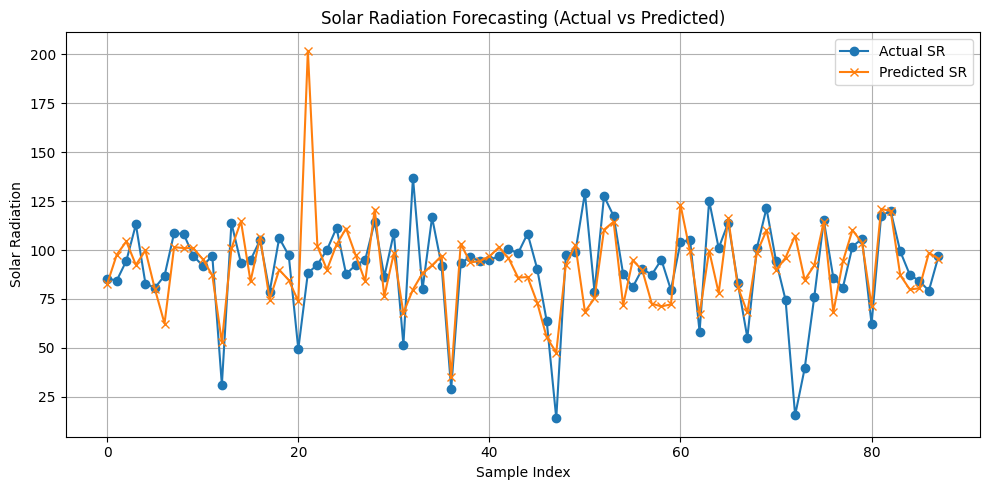

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_true, label='Actual SR', marker='o')
plt.plot(y_pred, label='Predicted SR', marker='x')
plt.title("Solar Radiation Forecasting (Actual vs Predicted)")
plt.xlabel("Sample Index")
plt.ylabel("Solar Radiation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
